In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/02_Data\ Manipulation/Part\ C\ -\ Pandas

# Chapter 10 - Working with Dates and Time Series Data 
### Hey Techie,   
Welcome to the tenth notebook of this Pandas tutorial series. We encourage you to take this notebook as a template to code along the instruction video, which you may find at: https://youtu.be/UFuo7EHI8zc. In this instruction video, Corey explains how to work with dates in DataFrames and applies this knowledge to real-word stock data from the cryptocurrency Ethereum. As always, at the end of the notebook, you may find some practice tasks to deepen your knowledge.

**Here you may find the Pandas documentation:** https://pandas.pydata.org/docs/reference/index.html   
**And here you can look up the datetime formatting codes**: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

#### Have fun! :-)   
    
*Video length*: 36 minutes   
*Self-study time*: 36 minutes   
*Total*: **72 minutes**
<hr style="border:2px solid gray"> </hr>   

## Real-word Example

In [19]:
# This is the convention used to import Pandas.
import pandas as pd

In [21]:
# These command loads the same stock data Corey uses in his video.
file_path3 = "/Users/amrensch/Documents/Coding2025/02_Data Manipulation/data/ETH_1h.csv"
df = pd.read_csv(file_path3)


**IMPORTANT NOTE**: Starting at minute 8:00, Corey explains how to write a date parser so that Pandas can convert dates to the desired format while reading in data. The code Corey uses is deprecated. Please use the following instead.

In [183]:
# Built-in library to work with dates.
from datetime import datetime
# Instead of using pd.datetime.strptime, use datetime.strptime.
d_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %I-%p")

In [161]:
file_path3 = "/Users/amrensch/Documents/Coding2025/02_Data Manipulation/data/ETH_1h.csv"
df = pd.read_csv(file_path3, parse_dates=['Date'],date_format='%Y-%m-%d %I-%p')

In [105]:
# START YOUR CODE HERE.
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [27]:
df.shape

(23674, 7)

In [33]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [37]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [39]:
df.loc[0, 'Date'].day_name()

'Friday'

In [57]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [63]:
df['DayofWeek'] = df['Date'].dt.day_name()
df

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [65]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [67]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [69]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [107]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [109]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [95]:
df

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [163]:
df.set_index('Date', inplace=True)
df=df.sort_index()

In [165]:
df.loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
...,...,...,...,...,...,...
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03


In [167]:
df.loc['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [169]:
df.loc['2020-01':'2020-02'].head(24)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82
2020-01-01 05:00:00,ETHUSD,129.56,129.94,129.47,129.83,232163.70
2020-01-01 06:00:00,ETHUSD,129.83,130.25,129.82,130.00,118328.64
2020-01-01 07:00:00,ETHUSD,130.00,130.25,129.80,129.87,112620.14
2020-01-01 08:00:00,ETHUSD,129.87,130.01,129.61,130.01,134231.17


In [173]:
df.loc['2020-01-01']['High'].max()

132.68

In [177]:
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [187]:
%matplotlib inline

In [189]:
highs.plot()

<Axes: xlabel='Date'>

In [195]:
import matplotlib.pyplot as plt

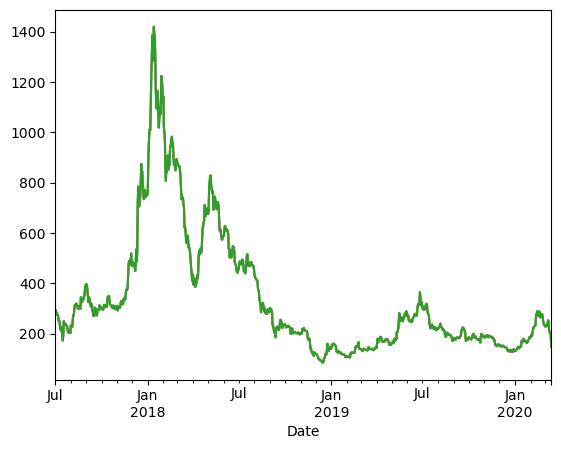

In [197]:
plt.show()

In [199]:
df.resample('W').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [201]:
df.shape

(23674, 6)

In [205]:
df_schema

NameError: name 'df_schema' is not defined

<hr style="border:2px solid gray"> </hr>   
   
## Practice Tasks   

In [53]:
# Load a clean DataFrame.
import pandas as pd
from datetime import datetime
file_path3 = "/Users/amrensch/Documents/Coding2025/02_Data Manipulation/data/ETH_1h.csv"
df = pd.read_csv(file_path3)
d_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %I-%p")
file_path3 = "/Users/amrensch/Documents/Coding2025/02_Data Manipulation/data/ETH_1h.csv"
df = pd.read_csv(file_path3, parse_dates=['Date'],date_format='%Y-%m-%d %I-%p')

#### 1. On which day in December 2018 Ethereum reached had its highest closing price? Use the mean to average the hourly data points. Store the day as a String in a variable named *closing_day*.
<br /> 
<details>    
<summary>
    <font size="3" color="red"><b>Hints (click to expand)</b></font>
</summary>
<p>
    <ul>
        <li>If you set the "Date" column as the DataFrame's index, you can easily extract the desired period with loc.</li>
        <li>The resample method allows you to aggregate date data.</li>
        <li>The idxmax method that is applicable to a Series object returns the index of the Series object's maximum rather than its value.</li>
    </ul>
</p>
</details>

In [23]:
# START YOUR CODE HERE.

#closing_day = ...
df
# END YOUR CODE HERE.

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [ ]:
# THIS CELL TESTS YOUR RESULTS.
assert closing_day == "Monday", "Your result seems to be incorrect!"

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution (click to expand)</b></font>
</summary>
<p>
    <code>desired_period = df.set_index(["Date"]).loc["2018-12", "Close"].resample("D").mean()</code><br />
    <code>closing_day = desired_period.idxmax().day_name()</code><br />
</p>
</details>   
   
#### 2. At what month in 2019 Ethereum had the highest closing price? Use the mean to average the hourly data points. Store the month as a String in a variable named *closing_month*.
<br /> 
<details>    
<summary>
    <font size="3" color="red"><b>Hints (click to expand)</b></font>
</summary>
<p>
    <ul>
        <li>If you set the "Date" column as the DataFrame's index, you can easily extract the desired period with loc.</li>
        <li>The resample method allows you to aggregate date data.</li>
        <li>The idxmax method that is applicable to a Series object returns the index of the Series object's maximum rather than its value.</li>
    </ul>
</p>
</details>

In [ ]:
# START YOUR CODE HERE.

closing_month = ...

# END YOUR CODE HERE.

In [ ]:
# THIS CELL TESTS YOUR RESULTS.
assert month_closing == "June", "Your result seems to be incorrect!"

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution (click to expand)</b></font>
</summary>
<p>
    <code>desired_period = df.set_index(["Date"]).loc["2019", "Close"].resample("M").mean()</code><br />
    <code>month_closing = desired_period.idxmax().month_name()</code><br />
</p>
</details>   
   
#### 3. On which days between 2017 and 2020 did Ethereum have the lowest and highest price? Use the mean to average the hourly data points and calculate the time delta between these two dates. Store timedelta as a Timedelta object in a variable named *timedelta*.
<br />
<details>    
<summary>
    <font size="3" color="red"><b>Hints (click to expand)</b></font>
</summary>
<p>
    <ul>
        <li>If you set the "Date" column as the DataFrame's index, you can easily extract the desired period with loc.</li>
        <li>The resample method allows you to aggregate date data.</li>
        <li>The idxmax method that is applicable to a Series object returns the index of the Series object's maximum rather than its value. There is also an idxmin method.</li>
    </ul>
        
</p>
</details>

In [ ]:
# START YOUR CODE HERE.

timedelta = ...

# END YOUR CODE HERE.

In [ ]:
# THIS CELL TESTS YOUR RESULTS.
assert type(timedelta) == type(pd.Timedelta(1)), "Please return a Timedelta object!"
assert np.abs(timedelta.days) == 335, "Your timedelta seems to be incorrect!"

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution (click to expand)</b></font>
</summary>
<p>
    <code>import numpy as np</code><br />
    <code>filt = (df["Date"] > "2017") & (df["Date"] < "2020")</code><br />
    <code>desired_period = df.loc[filt, ["High", "Low", "Date"]].set_index(["Date"]).resample("D").mean()</code><br />
    <code>timedelta = np.abs(desired_period["High"].idxmax()-desired_period["Low"].idxmin())</code><br />
</p>
</details>